## Setup

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import utils_11 as utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## EXERCISE 43 ■ Cities

In [3]:
filename = "data/cities.json"
cities = pd.read_json(filename)
cities.shape

(1000, 7)

In [8]:
cities.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania


### 01 Create a bar plot showing how many of the top 1,000 cities are in each state

In [ ]:
# Create a bar plot showing how many of the top 1,000 cities are in each state.
# There should be one vertical bar per state (with a few extra for nonstates such as
# Washington, DC). The plot should be ordered such that the state with the fewest
# cities in this list is on the left and the state with the most cities is on the right.

In [12]:
# Count number of cities per state and sort
cities_count = cities['state'].value_counts().sort_values()

# Filter states with at least 10 cities
cities_count = cities_count[cities_count >= 20]
cities_count

state
Wisconsin          20
Colorado           21
Indiana            21
New Jersey         22
North Carolina     22
Minnesota          24
Arizona            25
Washington         28
Michigan           31
Ohio               33
Massachusetts      36
Illinois           52
Florida            73
Texas              83
California        212
Name: count, dtype: int64

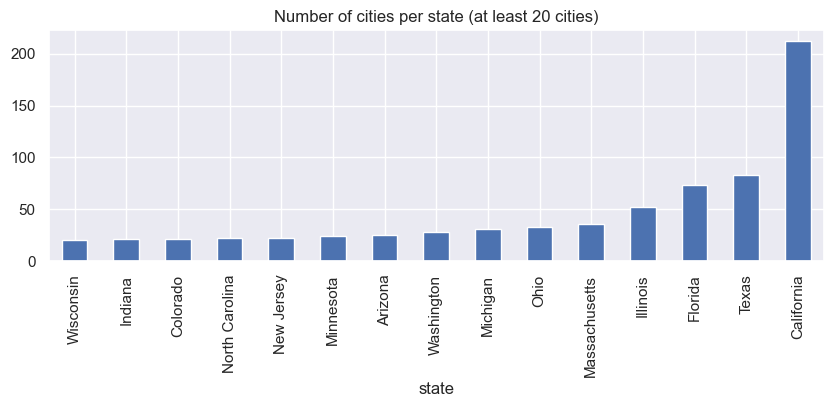

In [20]:
# Plot the result
title = 'Number of cities per state (at least 20 cities)'
cities_count.plot(kind='bar', figsize=(10, 3), title=title);

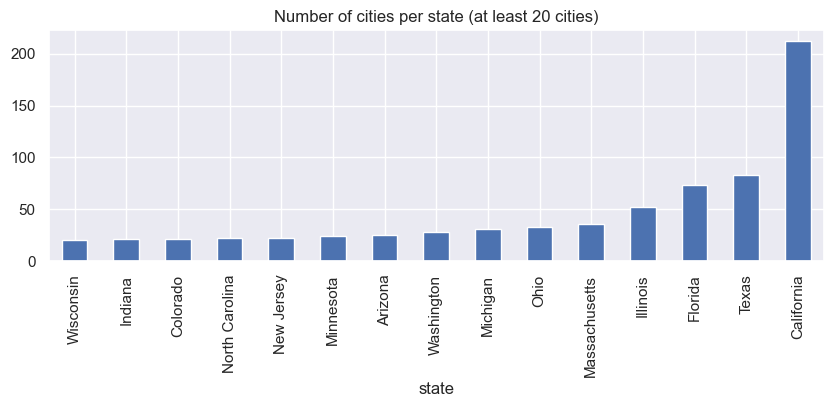

In [19]:
# The same result using groupby and size
cities_count = cities.groupby('state').size().sort_values()

# Filter states with at least 20 cities
cities_count = cities_count[cities_count >= 20]

# Plot the result
title = 'Number of cities per state (at least 20 cities)'
cities_count.plot.bar(figsize=(10, 3), title=title);

### 02 Create a bar plot comparing the growth of all cities in the state of Pennsylvania

In [ ]:
# Create a bar plot comparing the growth of all cities in the state of Pennsylvania.
# There should be one vertical bar per city, ordered with the slowest-growing city
# on the left and the fastest-growing city on the right.

In [42]:
cities_pennsylvania = cities[cities['state'] == 'Pennsylvania'].copy()
cities_pennsylvania = cities_pennsylvania.sort_values(by='growth_from_2000_to_2013')
cities_pennsylvania

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
289,Erie,-2.8%,42.129224,-80.085059,100671,290,Pennsylvania
888,Wilkes-Barre,-4.3%,41.245915,-75.881307,41108,889,Pennsylvania
811,Altoona,-7.3%,40.518681,-78.394736,45796,812,Pennsylvania
61,Pittsburgh,-8.3%,40.440625,-79.995886,305841,62,Pennsylvania
437,Scranton,0.0%,41.408969,-75.662412,75806,438,Pennsylvania
758,Harrisburg,0.6%,40.273191,-76.886701,49188,759,Pennsylvania
223,Allentown,11.2%,40.608430,-75.490183,118577,224,Pennsylvania
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania
604,Lancaster,4.5%,40.037875,-76.305514,59325,605,Pennsylvania
443,Bethlehem,5.2%,40.625932,-75.370458,75018,444,Pennsylvania


In [43]:
cities_pennsylvania.dtypes

city                         object
growth_from_2000_to_2013     object
latitude                    float64
longitude                   float64
population                    int64
rank                          int64
state                        object
dtype: object

In [44]:
cities_pennsylvania['growth_from_2000_to_2013'] = (
    cities_pennsylvania['growth_from_2000_to_2013']
    .str.rstrip('%')  # Remove trailing '%'
    .astype(float)    # Convert to float
)

In [45]:
cities_pennsylvania['growth_from_2000_to_2013'] /= 100  # Convert percentage to proportion  
cities_pennsylvania = cities_pennsylvania.sort_values(by='growth_from_2000_to_2013')
cities_pennsylvania

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
61,Pittsburgh,-0.083,40.440625,-79.995886,305841,62,Pennsylvania
811,Altoona,-0.073,40.518681,-78.394736,45796,812,Pennsylvania
888,Wilkes-Barre,-0.043,41.245915,-75.881307,41108,889,Pennsylvania
289,Erie,-0.028,42.129224,-80.085059,100671,290,Pennsylvania
437,Scranton,0.000,41.408969,-75.662412,75806,438,Pennsylvania
758,Harrisburg,0.006,40.273191,-76.886701,49188,759,Pennsylvania
4,Philadelphia,0.026,39.952584,-75.165222,1553165,5,Pennsylvania
604,Lancaster,0.045,40.037875,-76.305514,59325,605,Pennsylvania
443,Bethlehem,0.052,40.625932,-75.370458,75018,444,Pennsylvania
836,York,0.064,39.962598,-76.727745,43935,837,Pennsylvania


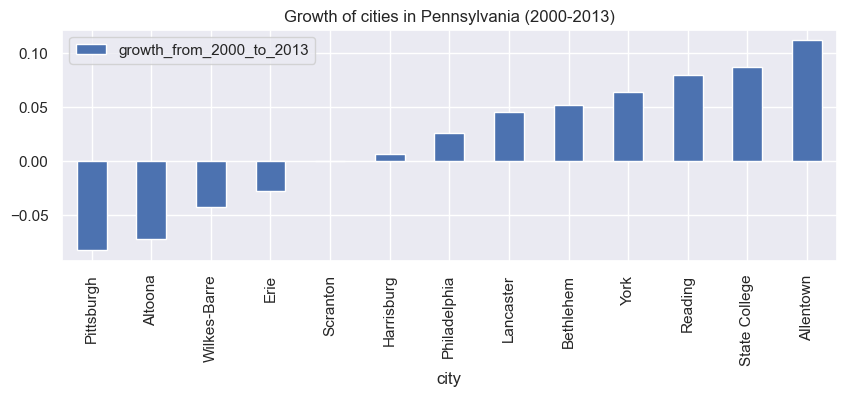

In [46]:
title = 'Growth of cities in Pennsylvania (2000-2013)'
cities_pennsylvania.plot.bar(x='city', y='growth_from_2000_to_2013', figsize=(10, 3),title=title);

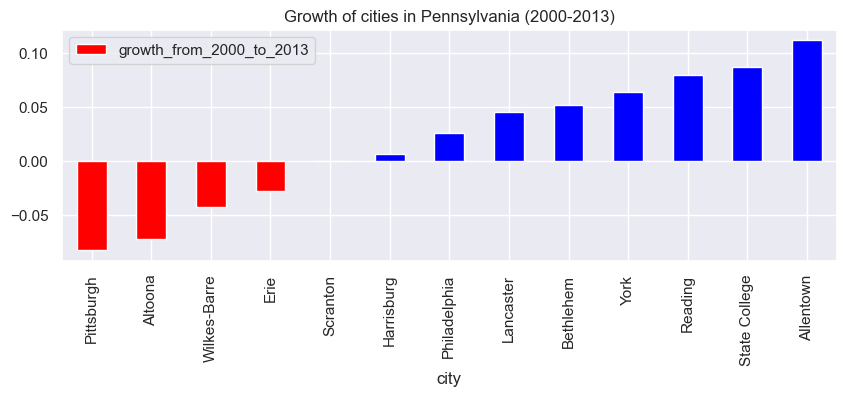

In [48]:
# Define colors: red for negative, blue for non-negative
colors = ['red' if val < 0 else 'blue' for val in cities_pennsylvania['growth_from_2000_to_2013']]

# Plot with custom colors
title = 'Growth of cities in Pennsylvania (2000-2013)'
cities_pennsylvania.plot.bar(x='city', y='growth_from_2000_to_2013', figsize=(10, 3), title=title, color=colors);

### 03 Create a pie plot showing how much each Massachusetts city in the list contributes to the overall population

In [ ]:
# Create a pie plot showing how much each Massachusetts city in the list contrib-
# utes to the overall population. (And no, I’m not trying to say that 100% of the
# population of that state resides in large cities.) There should be one pie seg-
# ment per city in the list, and its size should indicate how much it contributes to
# the total.

In [49]:
cities.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania


In [51]:
cities_MA = cities[cities['state'] == 'Massachusetts'].copy()
cities_MA.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
23,Boston,9.4%,42.360082,-71.058880,645966,24,Massachusetts
128,Worcester,5.8%,42.262593,-71.802293,182544,129,Massachusetts
157,Springfield,1.1%,42.101483,-72.589811,153703,158,Massachusetts
256,Lowell,3.4%,42.633425,-71.316172,108861,257,Massachusetts
263,Cambridge,5.5%,42.373616,-71.109733,107289,264,Massachusetts


In [56]:
# Compute total population for Massachusetts cities
total_pop = cities_MA['population'].sum()

# Add a new column for population share (as percentage)
cities_MA['population_share'] = (cities_MA['population'] / total_pop) * 100

# Sort by population share
cities_MA = cities_MA.sort_values(by='population_share', ascending=False)

# View the result
cities_MA[['city', 'population', 'population_share']].head()

,city,population,population_share
23,Boston,645966,21.481475
128,Worcester,182544,6.070466
157,Springfield,153703,5.111364
256,Lowell,108861,3.620152
263,Cambridge,107289,3.567875


In [58]:
# Compute the total share of cities with share less than 3%
small_cities_share = cities_MA[cities_MA['population_share'] < 3]['population_share'].sum()
small_cities_share

# Filter cities with at least 3% share and add a row for 'Other'
cities_MA_filtered = cities_MA[cities_MA['population_share'] >= 3].copy()
other_row = pd.DataFrame({
    'city': ['Other'],
    'population': [cities_MA[cities_MA['population_share'] < 3]['population'].sum()],
    'population_share': [small_cities_share]
})
cities_MA_filtered = pd.concat([cities_MA_filtered, other_row], ignore_index=True)
cities_MA_filtered

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state,population_share
0,Boston,9.4%,42.360082,-71.058880,645966,24.0,Massachusetts,21.481475
1,Worcester,5.8%,42.262593,-71.802293,182544,129.0,Massachusetts,6.070466
2,Springfield,1.1%,42.101483,-72.589811,153703,158.0,Massachusetts,5.111364
3,Lowell,3.4%,42.633425,-71.316172,108861,257.0,Massachusetts,3.620152
4,Cambridge,5.5%,42.373616,-71.109733,107289,264.0,Massachusetts,3.567875
5,New Bedford,1.2%,41.636215,-70.934205,95078,315.0,Massachusetts,3.161801
6,Brockton,-0.3%,42.083433,-71.018379,94089,317.0,Massachusetts,3.128912
7,Quincy,5.8%,42.252877,-71.002270,93494,320.0,Massachusetts,3.109125
8,Lynn,2.6%,42.466763,-70.949494,91589,333.0,Massachusetts,3.045775
9,Other,NaN,NaN,NaN,1434471,NaN,NaN,47.703057


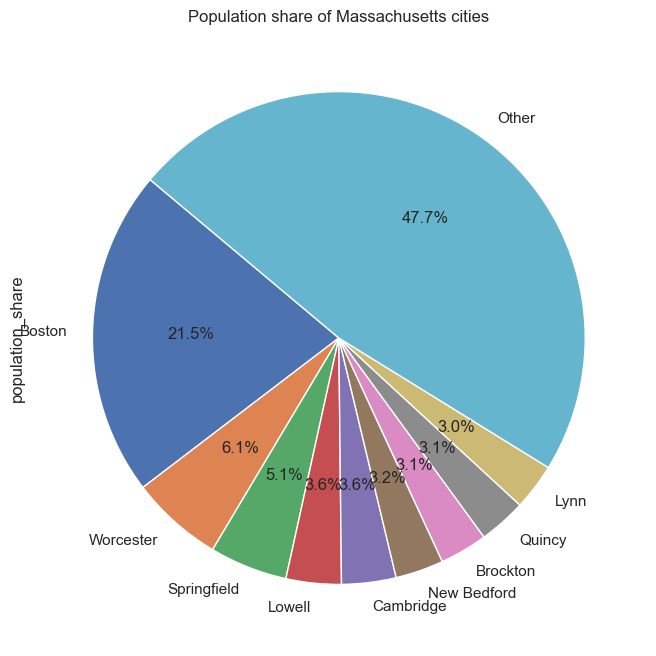

In [62]:
# Plot a pie chart
title = 'Population share of Massachusetts cities'
cities_MA_filtered.set_index('city')['population_share'].plot.pie(
    figsize=(8, 8), title=title, autopct='%1.1f%%', startangle=140);

### 04 Create a scatter plot 

In [ ]:
# Create a scatter plot of the cities, putting the longitude on the x axis and lati-
# tude on the y axis. What does the resulting plot look like?

In [4]:
cities.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania


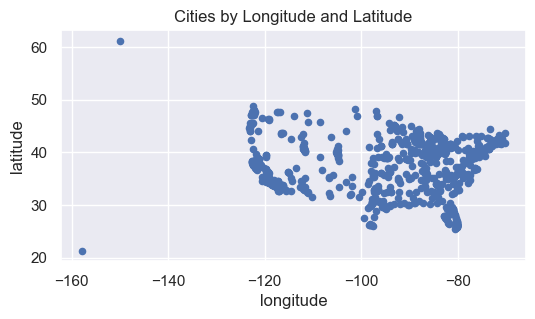

In [5]:
title = 'Cities by Longitude and Latitude'
cities.plot.scatter(x='longitude', y='latitude', figsize=(6, 3), title=title);

## EXERCISE 43 ■ Cities (Beyond the exercise)

### 01 Beyond the exercise

In [ ]:
# Create a histogram of the growth rates among cities in both Texas and Michigan

In [6]:
cities.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania


In [ ]:
growth_col = 'growth_from_2000_to_2013'

In [ ]:
# Check growth column for nan values or empty strings
cities[growth_col].isna().sum(), (cities[growth_col] == '').sum()

# Remove rows with NaN or empty growth values
cities_clean = cities[~cities[growth_col].isna() & (cities[growth_col] != '')].copy()
cities_clean.shape

(994, 7)

In [ ]:
# Convert growth column to numeric
cities_clean[growth_col] = (
    cities_clean[growth_col]
    .str.rstrip('%')  # Remove trailing '%'
    .astype(float) / 100
  )  # Convert to float and divide by 100

In [16]:
cities_clean.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,0.048,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,0.048,34.052234,-118.243685,3884307,2,California
2,Chicago,-0.061,41.878114,-87.629798,2718782,3,Illinois
3,Houston,0.110,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,0.026,39.952584,-75.165222,1553165,5,Pennsylvania


In [ ]:
# Extract cities in Texas and Michigan and sort by state and growth
states_of_interest = ['Texas', 'Michigan']
cities_tm = cities_clean[cities_clean['state'].isin(states_of_interest)].copy()
cities_tm = cities_tm.sort_values(by=['state', growth_col])
cities_tm.shape

(114, 7)

In [18]:
cities_tm.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
17,Detroit,-0.271,42.331427,-83.045754,688701,18,Michigan
296,Flint,-0.200,43.012527,-83.687456,99763,297,Michigan
735,Saginaw,-0.182,43.419470,-83.950807,50303,736,Michigan
593,Pontiac,-0.114,42.638922,-83.291047,59887,594,Michigan
989,Muskegon,-0.071,43.234181,-86.248392,37213,990,Michigan


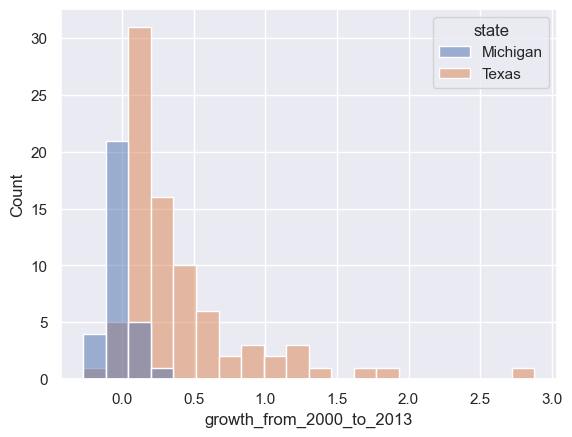

In [22]:
sns.histplot(
    data=cities_tm,
    x='growth_from_2000_to_2013',
    hue='state',
    bins=20,
    alpha=0.5,  # Transparency for overlap

);

### 02 Beyond the exercise

In [ ]:
# Create a histogram of the growth rates among cities in both Texas and
# California.

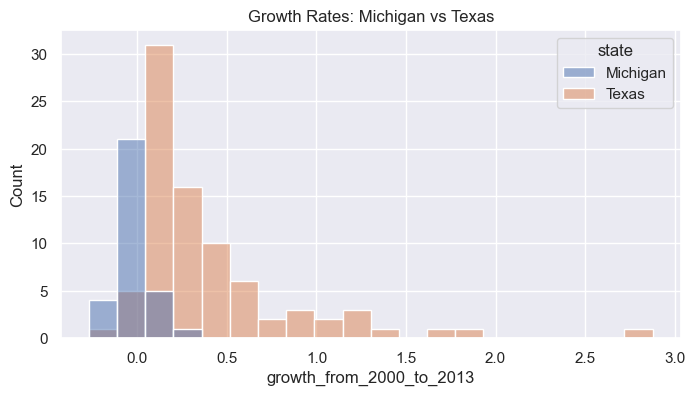

In [28]:
# Use the class CityGrowth to compare the growth of cities in Texas and Michigan
# To check if the class works as expected
states = ['Michigan', 'Texas']
cg = utils.CityGrowth(data=cities, states=states)
cg.plot_growth()

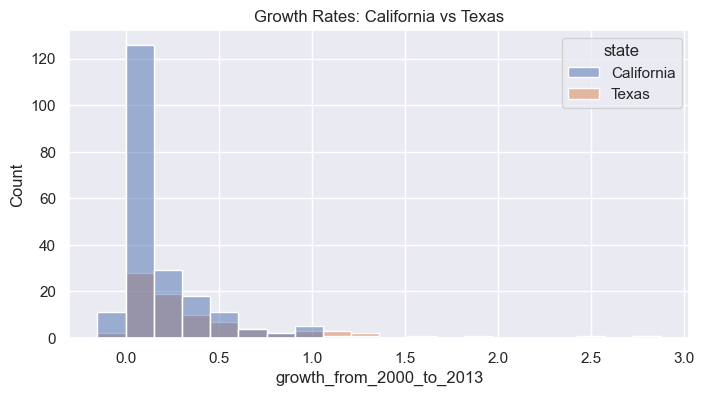

In [30]:
# Use the class CityGrowth to compare the growth of cities in Texas and California
# To answer the current exercise question
states = ['California', 'Texas']
cg = utils.CityGrowth(data=cities, states=states)
cg.plot_growth()

Weighted average growth for Michigan: -0.0763
Weighted average growth for Texas: 0.2940


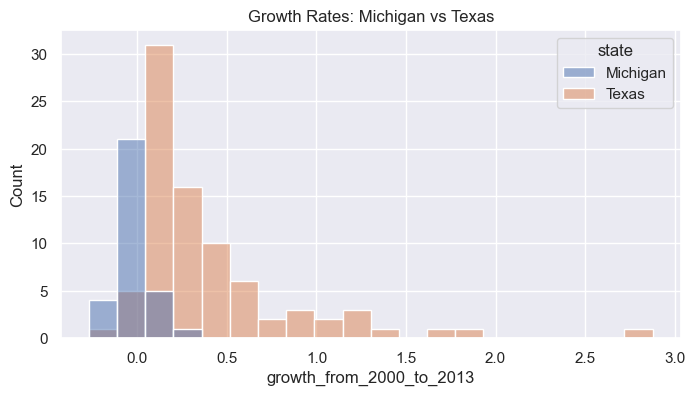

In [45]:
# Use the class CityGrowth to compare the growth of cities in Texas and Michigan
# To check if the class works as expected
states = ['Michigan', 'Texas']
cg = utils.CityGrowth(data=cities, states=states)
cg.plot_growth(verbose=True)

Weighted average growth for California: 0.1637
Weighted average growth for Texas: 0.2940


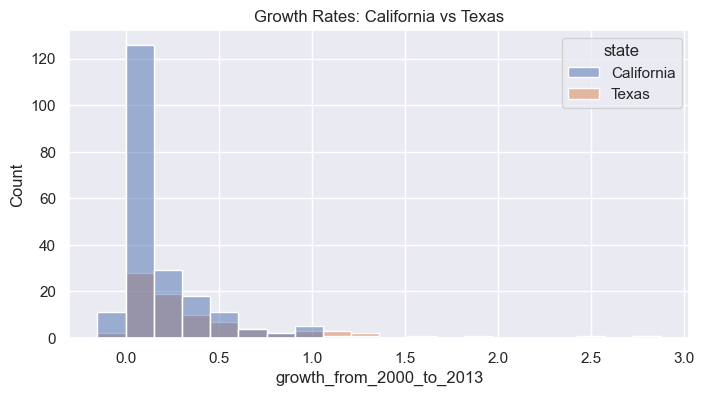

In [46]:
# Use the class CityGrowth to compare the growth of cities in Texas and California
# To answer the current exercise question
states = ['California', 'Texas']
cg = utils.CityGrowth(data=cities, states=states)
cg.plot_growth(verbose=True)

### 03 Beyond the exercise

In [ ]:
# Create a bar plot from the average growth per state.

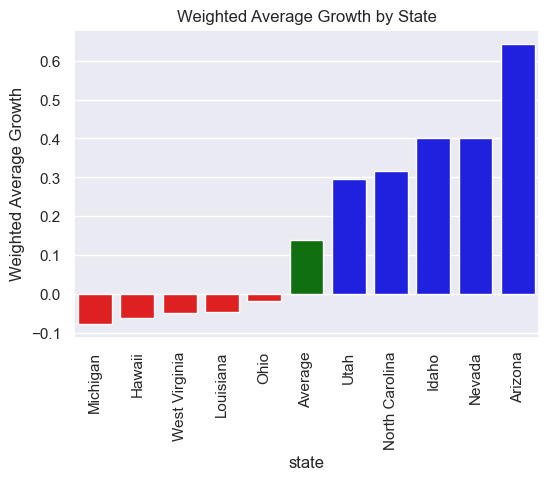

In [57]:
# Create a bar plot from the average weighted growth per state
cg = utils.CityGrowth(data=cities)
cg.plot_weighted_avg_growth()